# Kaggle Pistachio Image Dataset
[참고 \| ❤ENetB7 Explained 98% ✅ Fine Tuning ✅ EDA✅](https://www.kaggle.com/code/abdulbasitniazi/enetb7-explained-98-fine-tuning-eda)
## By making a Fine Tuning to a Pre-Trained network

### 사용 라이브러리

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import pathlib
import splitfolders

import PIL
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

## Introudction
이미 훈련된 네트워크 모델을 이용해 피스타치오 종 분류

## Data Load

In [31]:
data_dir = "Pistachio_Image_Dataset/Pistachio_Image_Dataset/"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Pistachio_Image_Dataset/Pistachio_Image_Dataset')

In [32]:
Total_Img = glob.glob("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/*/*.jpg")

print(f"Total Images: {len(Total_Img)}")

Total Images: 2148


2개의 피스타치오 종 (`Kirmizi`와 `Siirt`)이 총 2148개 있음

In [33]:
Total_Img = pd.Series(Total_Img)

total_df = pd.DataFrame()
total_df["Filename"] = Total_Img.map(lambda img_name: img_name.split("\\")[-1])
total_df["ClassId"] = Total_Img.map(lambda img_name: img_name.split("\\")[-2])

total_df.head()

,Filename,ClassId
0,kirmizi (1).jpg,Kirmizi_Pistachio
1,kirmizi (10).jpg,Kirmizi_Pistachio
2,kirmizi (11).jpg,Kirmizi_Pistachio
3,kirmizi (12).jpg,Kirmizi_Pistachio
4,kirmizi (13).jpg,Kirmizi_Pistachio


In [34]:
class_id_distributionTotal = total_df["ClassId"].value_counts()
class_id_distributionTotal

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: ClassId, dtype: int64

## 전체 데이터의 분포 확인

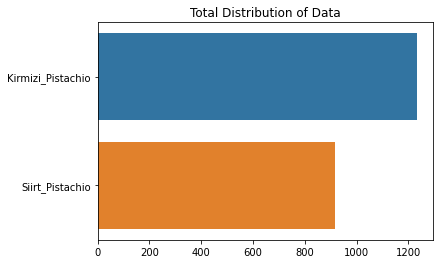

In [35]:
_ = sns.barplot(x=class_id_distributionTotal.values, y=class_id_distributionTotal.index).set_title("Total Distribution of Data")

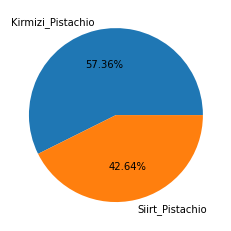

In [36]:
plt.figure(facecolor="white")
_ = plt.pie(class_id_distributionTotal.values, labels=class_id_distributionTotal.index, autopct="%.2f%%")

## 데이터 나누기
Train : Test : Val = 80 : 10 : 10

In [37]:
splitfolders.ratio(data_dir, output="output", ratio=(0.8, 0.1, 0.1))

Copying files: 2148 files [00:10, 195.75 files/s]


`splitfolders` 라이브러리를 사용하면, 지정한 경로에 분할된 데이터가 폴더로 생성됨

In [39]:
train_path = "output/train/"
val_path = "output/val/"
test_path = "output/test/"
class_names = os.listdir(train_path)
class_names_val = os.listdir(val_path)
class_names_test = os.listdir(test_path)

In [63]:
train_image = glob.glob('./output/train/*/*.jpg')
test_image = glob.glob('./output/test/*/*.jpg')
Val_image = glob.glob('./output/val/*/*.jpg')

print(f"\
training images: {len(train_image)}\n\
validation images: {len(Val_image)}\n\
test images: {len(test_image)}\
    ")

training images: 1717
validation images: 214
test images: 217    


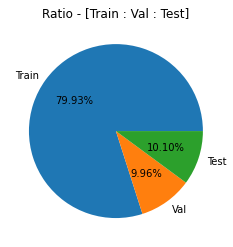

In [64]:
data = [len(train_image), len(Val_image), len(test_image)]
labels = ["Train", "Val", "Test"]

plt.figure(facecolor="white")
_ = plt.pie(data, labels=labels, autopct="%.2f%%")
plt.title("Ratio - [Train : Val : Test]")
plt.show()

### Train / Validation / Test

In [75]:
# Train
train_image_names = pd.Series(train_image)
train_df = pd.DataFrame({"Filename":[x for x in train_image_names.map(lambda img_name: img_name.split("\\")[-1])],
                         "ClassId":[x for x in train_image_names.map(lambda img_name: img_name.split("\\")[-2])]})
# Val
val_image_names = pd.Series(Val_image)
val_df = pd.DataFrame({"Filename":[x for x in val_image_names.map(lambda img_name: img_name.split("\\")[-1])],
                         "ClassId":[x for x in val_image_names.map(lambda img_name: img_name.split("\\")[-2])]})
# Test
test_image_names = pd.Series(test_image)
test_df = pd.DataFrame({"Filename":[x for x in test_image_names.map(lambda img_name: img_name.split("\\")[-1])],
                         "ClassId":[x for x in test_image_names.map(lambda img_name: img_name.split("\\")[-2])]})


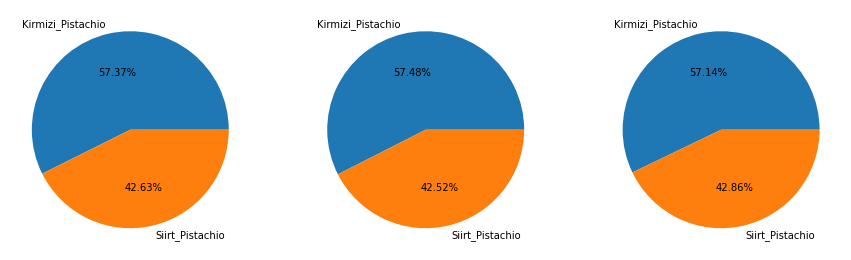

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx, df in enumerate([train_df, val_df, test_df]):
    axex = ax[idx]
    df = df["ClassId"].value_counts()
    axex.pie(df.values, labels=df.index, autopct="%.2f%%")
plt.show()

데이터가 균일하게 나눠졌음

## 데이터 출력하기 (이미지)

In [92]:
train_df

,Filename,ClassId
0,kirmizi (10).jpg,Kirmizi_Pistachio
1,kirmizi (11).jpg,Kirmizi_Pistachio
2,kirmizi (12).jpg,Kirmizi_Pistachio
3,kirmizi (13).jpg,Kirmizi_Pistachio
4,kirmizi (15).jpg,Kirmizi_Pistachio
...,...,...
1712,siirt 95.jpg,Siirt_Pistachio
1713,siirt 96.jpg,Siirt_Pistachio
1714,siirt 97.jpg,Siirt_Pistachio
1715,siirt 98.jpg,Siirt_Pistachio


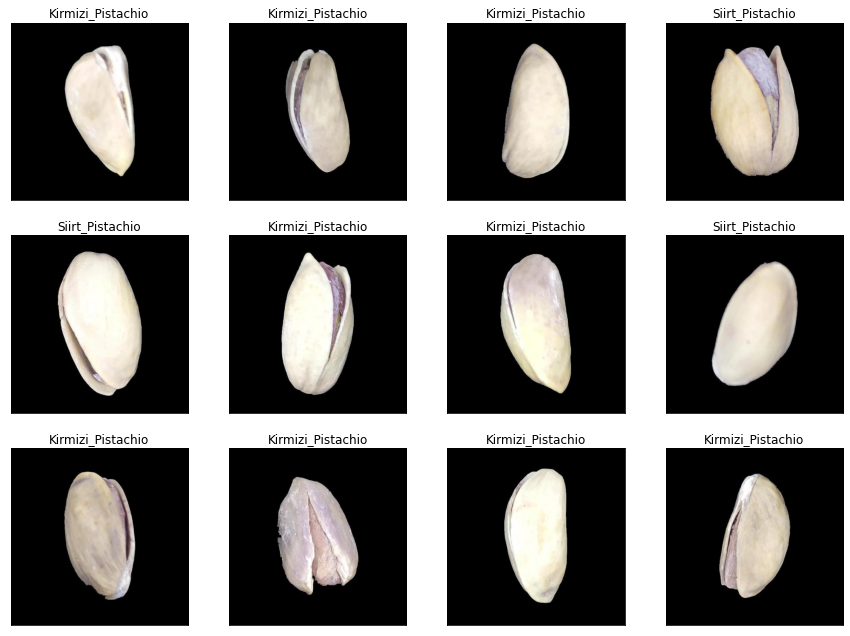

In [93]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for _ in range(12):
    img_name = plot_df.loc[_, "Filename"]
    label_str = plot_df.loc[_, "ClassId"]
    plt.subplot(4, 4, _+1)
    plt.imshow(plt.imread(os.path.join(train_path, label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

## Image Data Generator

In [94]:
train_datagen = ImageDataGenerator(zoom_range=0.15, width_shift_range=0.2, shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, shuffle=True, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, shuffle=False, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path, target_size=(224,224), batch_size=32, shuffle=False, class_mode='binary')

Found 1717 images belonging to 2 classes.
Found 217 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


## Network: Efficent Net
> EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks  

스케일링을 체계적으로 연구하고 네트워크 깊이와 폭, 해상도 조절로 성능 향상을 이룬 네트워크 모델  
기존에 네트워크를 확장하는 일반적인 방법은 깊이를 확장하는 것이었음  
예를들어, ResNet은 18->150으로 층을 확장했지만 차원(Demension)은 여전히 1개뿐임  
  
**네트워크가 3차원 모두에서 균일하게 분류**되어야 한다는 관점을 적용함

In [95]:
from tensorflow.keras.applications import EfficientNetB0

model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

16711680/16705208 [==============================] - 0s 0us/step


### Fine Tuning

In [97]:
model.trainable = True

for layer in model.layers[:-15]:
    layer.trainable = False

In [101]:
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(model.input, x)

In [102]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ["accuracy"]
)

In [ ]:
# 모델 볼륨이 커서 출력 안함
# plot_model(model, to_file="convnet.png", show_shapes=True, show_layer_names=True)

### Call Backs

In [105]:
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=0, patience=20)
model_check = ModelCheckpoint("model.h5", monitor="val_accuracy", mode="max", save_best_only=True)

## Train the Model

In [108]:
with tf.device("/device:GPU:0"):
    history = model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1, callbacks=[early_stopping, model_check])

Epoch 1/50
54/54 [==============================] - 23s 422ms/step - loss: 0.3424 - accuracy: 0.9330 - val_loss: 0.1209 - val_accuracy: 0.9579


c:\Users\spec3\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
54/54 [==============================] - 17s 309ms/step - loss: 0.2074 - accuracy: 0.9464 - val_loss: 0.7111 - val_accuracy: 0.8692
Epoch 3/50
54/54 [==============================] - 17s 321ms/step - loss: 0.1741 - accuracy: 0.9610 - val_loss: 0.4261 - val_accuracy: 0.8972
Epoch 4/50
54/54 [==============================] - 17s 314ms/step - loss: 0.1761 - accuracy: 0.9616 - val_loss: 0.3144 - val_accuracy: 0.9393
Epoch 5/50
54/54 [==============================] - 18s 329ms/step - loss: 0.1495 - accuracy: 0.9645 - val_loss: 0.5214 - val_accuracy: 0.8738
Epoch 6/50
54/54 [==============================] - 17s 309ms/step - loss: 0.1554 - accuracy: 0.9656 - val_loss: 0.1196 - val_accuracy: 0.9860
Epoch 7/50
54/54 [==============================] - 17s 311ms/step - loss: 0.1662 - accuracy: 0.9645 - val_loss: 1.7373 - val_accuracy: 0.7897
Epoch 8/50
54/54 [==============================] - 17s 314ms/step - loss: 0.2020 - accuracy: 0.9645 - val_loss: 1.2868 - val_accuracy: 0.8598

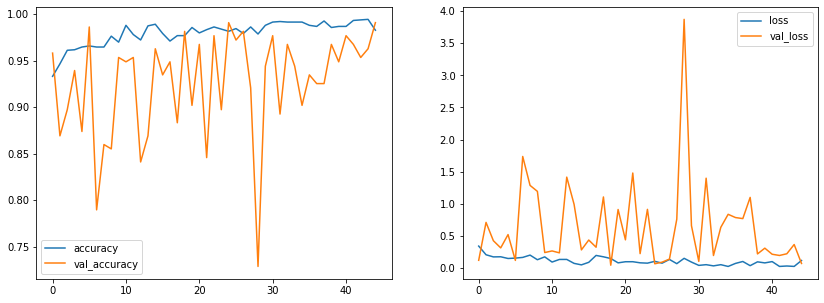

In [114]:
hist_df = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
hist_df[["accuracy", "val_accuracy"]].plot(ax=ax[0])
hist_df[["loss", "val_loss"]].plot(ax=ax[1])
plt.show()

## Model Evaliation

In [115]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

7/7 [==============================] - 2s 268ms/step - loss: 0.3866 - accuracy: 0.9631
Loss: 38.660
Accuracy: 96.313


## Classification Report

In [119]:
y_val = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       124
           1       0.00      0.00      0.00        93

    accuracy                           0.57       217
   macro avg       0.29      0.50      0.36       217
weighted avg       0.33      0.57      0.42       217

